Regressão Polinomial: É uma forma de de regressão linear. A diferença está
em como ela trata as features (variáveis independentes). Ao invés
de modelar uma relação linear direta
entre a variável independente x e a
variável dependente y (como na regressão linear simples: y = b0 + b1X), a regressão polinomial adiciona termos polinomiais (potências da variável independente) á equação.

No final, construiremos 2 graficos de pontos com o objetivo de comparar a regressão polinomial com a regressão linear

Criação do gráfico ira comparar os valores da predição polinomial com os dados reais da base de dados

In [77]:
def showplotpolinomial(xpontos, ypontos, xlinha, ylinha):
    
    import matplotlib.pyplot as plt
    
    plt.scatter(xpontos, ypontos, color='red')
    
    plt.plot(xlinha, ylinha, color='blue')
    
    plt.title("Comparando pontos reais com a reta produzida pela regressão polinomial")
    
    plt.xlabel("Experiência em anos")
    
    plt.ylabel('Salário')
    
    plt.show()

In [78]:
def showplotlinear(X, y, linearRegressor):
    import matplotlib.pyplot as plt

    plt.scatter(X, y, color = 'red') #plot real y points
    plt.plot(X, linearRegressor.predict(X), color = 'blue') #plot predicted points in line
    plt.title("Comparando pontos reais com a reta produzida pela regressão linear")
    plt.xlabel("Experiência em anos")
    plt.ylabel("Salário")
    plt.show()

In [79]:
def computarRegressaoPolinomial(x, y, d):
    
    from sklearn.preprocessing import PolynomialFeatures
    
    
    polinomio = PolynomialFeatures(degree=d)
    
    xpolinomio = polinomio.fit_transform(x)
    
    from sklearn.linear_model import LinearRegression
    
    regressoalinearpolinomial = LinearRegression()
    
    regressoalinearpolinomial.fit(xpolinomio, y)
    
    return xpolinomio, regressoalinearpolinomial
    
    
    
    

In [ ]:
def computarregressaolinear(x, y):
    
    from sklearn.linear_model import LinearRegression
    
    from sklearn.model_selection import train_test_split
    
    regressao = LinearRegression()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    regressao.fit(x_train, y_train)
    
    return regressao

In [81]:
def progressaopolinomial(nome_arquivo, delimitador = None):
    
    import time
    
    from minhasfuncoes import funcoes
    
    tempo_inicial = time.time()
    
    x, y = funcoes.carregar_Dataset(nome_arquivo, delimitador)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para o carregamento do dataset %.2f"% tempo_percorrido, " segundos")
    
    tempo_inicial = time.time()
    
    regressaoLinear = computarregressaolinear(x, y)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para a construção da regressão linear: %.2f"% tempo_percorrido, " segundos")
    
    tempo_inicial = time.time()
    
    xpoly, polylinear = computarRegressaoPolinomial(x, y, 4)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para a construção do modelo polinomial: %.2f"% tempo_percorrido, " segundos")
    
    showplotlinear(x, y,regressaoLinear)
    
    showplotpolinomial(x, y,x, polylinear.predict(xpoly))

Tempo necessário para o carregamento do dataset 0.03  segundos
Tempo necessário para a construção da regressão linear: 0.01  segundos
Tempo necessário para a construção do modelo polinomial: 0.01  segundos


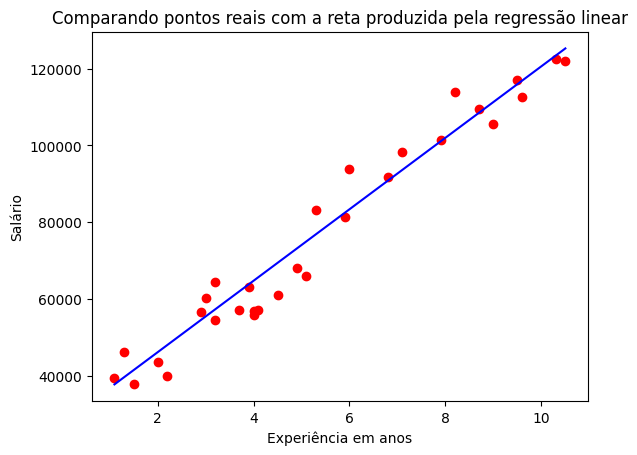

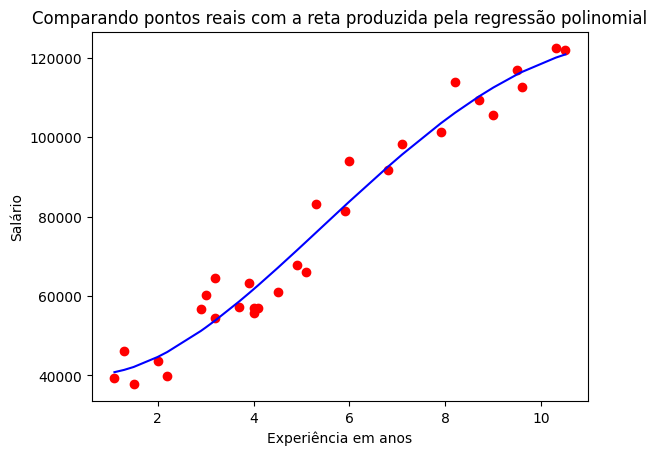

In [82]:
progressaopolinomial('Dados/salary.csv', ";")